In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
df = pd.read_csv("tripadvisor_review.csv")
df.head(5)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [45]:
X = df.drop(columns='User ID',axis=1)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X_scaled)

In [49]:
reduced_data = pd.DataFrame(x_reduced,columns=['PCA1','PCA2'])

In [50]:
reduced_data

,PCA1,PCA2
0,2.407573,-0.073039
1,5.311237,-0.022500
2,-0.807839,-1.776951
3,-1.065346,0.856401
4,0.987246,-0.076777
...,...,...
975,-2.135609,-0.786899
976,-0.495717,-1.335973
977,-1.064439,0.458641
978,-2.200982,-1.958907


Text(0.5, 1.0, 'PCA Dimensionality Reduction')

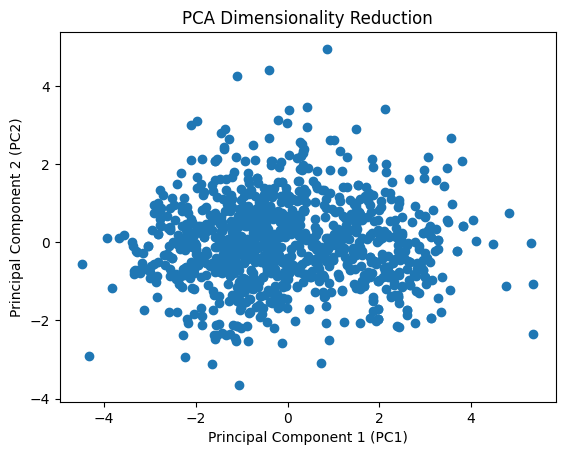

In [56]:
plt.scatter(reduced_data['PCA1'], reduced_data['PCA2'])  # Scatter plot of PC1 vs PC2
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Dimensionality Reduction')

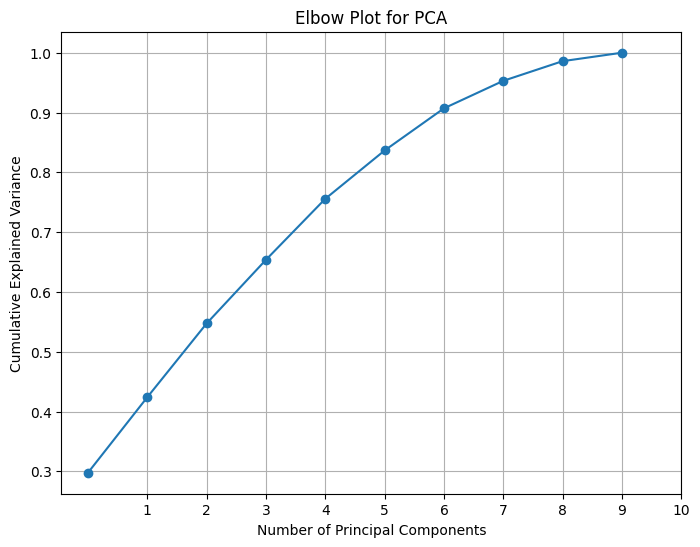

In [59]:
# Elbow Plot
pca_full = PCA().fit(X_scaled) # fit PCA on scaled data with all components

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.xticks(np.arange(1, len(pca_full.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()